# Loan Repayment Prediction: Insights from Data

In [2]:
import os
import pandas as pd

### Preprocessing Steps

In [3]:
original_data = pd.read_csv('data/customers_loan.csv')
del original_data['Unnamed: 0']
original_data.head()

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
original_data.dtypes

loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [5]:
original_data["education"].value_counts()
# So we need to apply lable encoding to education column

education
High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: count, dtype: int64

In [6]:
original_data["Gender"].value_counts()
# There are only 2 categories so that we can apply binay encoding to gender

Gender
male      294
female     52
Name: count, dtype: int64

In [7]:
# check null values
original_data.isnull().sum()

loan_status       0
Principal         0
terms             0
effective_date    0
due_date          0
age               0
education         0
Gender            0
dtype: int64

In [8]:
original_data["loan_status"].value_counts()
# So there is a class imbalance for the target variable

loan_status
PAIDOFF       260
COLLECTION     86
Name: count, dtype: int64

### Feature engineering

In [9]:
updated_df = original_data.copy()
# convert dates
updated_df['effective_date'] = pd.to_datetime(updated_df['effective_date'],format='%m/%d/%Y')
updated_df['due_date'] = pd.to_datetime(updated_df['due_date'],format='%m/%d/%Y')
updated_df.dtypes

loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

In [10]:
# Create a new column for the number of days between the effective date and the due date
updated_df['DaysBetween'] = (updated_df['due_date'] - updated_df['effective_date']).dt.days
updated_df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,DaysBetween
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,29
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,29
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,14
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,29
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,29
...,...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,14
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,29
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,14
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,59


In [11]:
# Extract year, month and day from both 'effective_date' and 'due_date'
updated_df['Effective_Year'] = updated_df['effective_date'].dt.year
updated_df['Effective_Month'] = updated_df['effective_date'].dt.month
updated_df["Effective_Day"] = updated_df['effective_date'].dt.day

updated_df['Due_Year'] = updated_df['due_date'].dt.year
updated_df['Due_Month'] = updated_df['due_date'].dt.month
updated_df["Due_Day"] = updated_df['due_date'].dt.day

# Display the updated dataframe
updated_df


,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,DaysBetween,Effective_Year,Effective_Month,Effective_Day,Due_Year,Due_Month,Due_Day
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,29,2016,9,8,2016,10,7
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,29,2016,9,8,2016,10,7
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,14,2016,9,8,2016,9,22
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,29,2016,9,9,2016,10,8
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,29,2016,9,9,2016,10,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,14,2016,9,11,2016,9,25
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,29,2016,9,11,2016,10,10
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,14,2016,9,12,2016,9,26
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,59,2016,9,12,2016,11,10


In [ ]:
# Categories ages into 3 bins: Young, Middle-aged, and Old
max_young = updated_df['age'].quantile(0.3)
max_middle_aged = updated_df['age'].quantile(0.6)

# Categorize based on these cutoffs
def categorize_age(age):
    if age <= max_young:
        return 'Young'
    elif age <= max_middle_aged:
        return 'Middle-aged'
    else:
        return 'Old'

# Apply the function to create age_bin categories
updated_df['age_bin'] = updated_df['age'].apply(categorize_age)

# One-hot encoding for the new age bins
age_dummies = pd.get_dummies(updated_df['age_bin'], prefix='is')

# Concatenate the one-hot encoded columns to the original dataframe
updated_df = pd.concat([updated_df, age_dummies], axis=1)
updated_df['is_Young'] = updated_df['is_Young'].astype(int)
updated_df['is_Middle-aged'] = updated_df['is_Middle-aged'].astype(int)
updated_df['is_Old'] = updated_df['is_Old'].astype(int)
updated_df

In [12]:
# Aapply label encoding to education column
education_mapping = {
    'High School or Below': 0,
    'college': 1,
    'Bechalor': 2,
    'Master or Above': 3
}

# Apply the mapping to the 'education' column
updated_df['education_encoded'] = updated_df['education'].map(education_mapping)
updated_df

,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,DaysBetween,Effective_Year,Effective_Month,Effective_Day,Due_Year,Due_Month,Due_Day,age_bin,is_Middle-aged,is_Old,is_Young,education_encoded
0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,29,2016,9,8,2016,10,7,Old,0,1,0,0
1,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,29,2016,9,8,2016,10,7,Old,0,1,0,2
2,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,14,2016,9,8,2016,9,22,Young,0,0,1,1
3,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,29,2016,9,9,2016,10,8,Middle-aged,1,0,0,1
4,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,29,2016,9,9,2016,10,8,Middle-aged,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,COLLECTION,800,15,2016-09-11,2016-09-25,32,High School or Below,male,14,2016,9,11,2016,9,25,Middle-aged,1,0,0,0
342,COLLECTION,1000,30,2016-09-11,2016-10-10,25,High School or Below,male,29,2016,9,11,2016,10,10,Young,0,0,1,0
343,COLLECTION,800,15,2016-09-12,2016-09-26,39,college,male,14,2016,9,12,2016,9,26,Old,0,1,0,1
344,COLLECTION,1000,30,2016-09-12,2016-11-10,28,college,male,59,2016,9,12,2016,11,10,Middle-aged,1,0,0,1


In [ ]:
# Apply binary encoding to gender
# Because there are only two categories, we can use binary encoding
updated_df['Gender_encoded'] = updated_df['Gender'].apply(lambda x: 1 if x == 'male' else 0)
updated_df

In [ ]:
# min max norm :: Principal	terms    age	DaysBetween
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['Principal', 'terms', 'age', 'DaysBetween','Effective_Month',  'Due_Month', 'Effective_Day', 'Due_Day', 'Effective_Year', 'Due_Year']
scaler = MinMaxScaler()
updated_df[columns_to_normalize] = scaler.fit_transform(updated_df[columns_to_normalize])
updated_df


In [ ]:
# apply binary encoding to loan_status
updated_df['loan_status_encoded'] = updated_df['loan_status'].apply(lambda x: 1 if x == 'PAIDOFF' else 0)
updated_df

In [17]:
selected_features = updated_df[["loan_status_encoded",'Principal', 'terms', 'age', 'DaysBetween', 'education_encoded', "Gender_encoded", 'is_Young', 'is_Middle-aged', 'is_Old', 'Effective_Month',  'Due_Month', 'Effective_Day', 'Due_Day', 'Effective_Year', 'Due_Year']]
selected_features.head()

,loan_status_encoded,Principal,terms,age,DaysBetween,education_encoded,Gender_encoded,is_Young,is_Middle-aged,is_Old,Effective_Month,Due_Month,Effective_Day,Due_Day,Effective_Year,Due_Year
0,1,1.0,1.000000,0.818182,0.433962,0,1,0,0,1,0.0,0.5,0.000000,0.000000,0.0,0.0
1,1,1.0,1.000000,0.454545,0.433962,2,0,0,0,1,0.0,0.5,0.000000,0.000000,0.0,0.0
2,1,1.0,0.347826,0.272727,0.150943,1,1,1,0,0,0.0,0.0,0.000000,0.714286,0.0,0.0
3,1,1.0,1.000000,0.303030,0.433962,1,0,0,1,0,0.0,0.5,0.166667,0.047619,0.0,0.0
4,1,1.0,1.000000,0.333333,0.433962,1,1,0,1,0,0.0,0.5,0.166667,0.047619,0.0,0.0


In [19]:
selected_features.dtypes

loan_status_encoded      int64
Principal              float64
terms                  float64
age                    float64
DaysBetween            float64
education_encoded        int64
Gender_encoded           int64
is_Young                 int64
is_Middle-aged           int64
is_Old                   int64
Effective_Month        float64
Due_Month              float64
Effective_Day          float64
Due_Day                float64
Effective_Year         float64
Due_Year               float64
dtype: object

In [20]:
# apply oversampling to balance the classes
from imblearn.over_sampling import RandomOverSampler
X = selected_features.drop('loan_status_encoded', axis=1)
y = selected_features['loan_status_encoded']
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
resampled_counts = y_resampled.value_counts()
resampled_counts

loan_status_encoded
1    260
0    260
Name: count, dtype: int64

### Split dataset

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
# train test split
X = df_resampled.drop(columns=['loan_status_encoded'])
y = df_resampled['loan_status_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

### Logistic Regression

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Initialize the Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Predict outcomes for the test set
y_pred = logreg_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Add predictions to the test_data for inspection
test_data['Predicted_Outcome'] = y_pred

# Print first few rows of test data with predictions
print(test_data.head())


Accuracy: 0.6827
Confusion Matrix:
[[37 11]
 [22 34]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.77      0.69        48
           1       0.76      0.61      0.67        56

    accuracy                           0.68       104
   macro avg       0.69      0.69      0.68       104
weighted avg       0.70      0.68      0.68       104

     Principal     terms       age  DaysBetween  education_encoded  \
275        1.0  1.000000  0.575758     0.433962                  1   
93         1.0  1.000000  0.303030     0.433962                  1   
6          1.0  1.000000  0.303030     0.433962                  1   
167        1.0  0.347826  0.666667     0.150943                  1   
90         1.0  1.000000  0.272727     1.000000                  1   

     Gender_encoded  is_Young  is_Middle-aged  is_Old  Effective_Month  \
275               1         0               0       1              0.0   
93                1        

### Random forest

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)  # You can tune n_estimators

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict outcomes for the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Add predictions to the test_data for inspection
test_data['Predicted_Outcome'] = y_pred

# Print first few rows of test data with predictions
print(test_data.head())


Accuracy: 0.8462
Confusion Matrix:
[[47  1]
 [15 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.85        48
           1       0.98      0.73      0.84        56

    accuracy                           0.85       104
   macro avg       0.87      0.86      0.85       104
weighted avg       0.88      0.85      0.84       104

     Principal     terms       age  DaysBetween  education_encoded  \
275        1.0  1.000000  0.575758     0.433962                  1   
93         1.0  1.000000  0.303030     0.433962                  1   
6          1.0  1.000000  0.303030     0.433962                  1   
167        1.0  0.347826  0.666667     0.150943                  1   
90         1.0  1.000000  0.272727     1.000000                  1   

     Gender_encoded  is_Young  is_Middle-aged  is_Old  Effective_Month  \
275               1         0               0       1              0.0   
93                1        

### KNN

In [24]:
###
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the K-Nearest Neighbors (KNN) model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Predict outcomes for the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Add predictions to the test_data for inspection
test_data['Predicted_Outcome'] = y_pred

# Print first few rows of test data with predictions
print(test_data.head())


Accuracy: 0.6154
Confusion Matrix:
[[38 10]
 [30 26]]
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.79      0.66        48
           1       0.72      0.46      0.57        56

    accuracy                           0.62       104
   macro avg       0.64      0.63      0.61       104
weighted avg       0.65      0.62      0.61       104

     Principal     terms       age  DaysBetween  education_encoded  \
275        1.0  1.000000  0.575758     0.433962                  1   
93         1.0  1.000000  0.303030     0.433962                  1   
6          1.0  1.000000  0.303030     0.433962                  1   
167        1.0  0.347826  0.666667     0.150943                  1   
90         1.0  1.000000  0.272727     1.000000                  1   

     Gender_encoded  is_Young  is_Middle-aged  is_Old  Effective_Month  \
275               1         0               0       1              0.0   
93                1        

### SVM

In [25]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the SVM model
svm_model = SVC(random_state=42, kernel='rbf')  # You can tune kernel type ('linear', 'rbf', 'poly', etc.)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predict outcomes for the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Add predictions to the test_data for inspection
test_data['Predicted_Outcome'] = y_pred

# Print first few rows of test data with predictions
print(test_data.head())


Accuracy: 0.6827
Confusion Matrix:
[[36 12]
 [21 35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.75      0.69        48
           1       0.74      0.62      0.68        56

    accuracy                           0.68       104
   macro avg       0.69      0.69      0.68       104
weighted avg       0.69      0.68      0.68       104

     Principal     terms       age  DaysBetween  education_encoded  \
275        1.0  1.000000  0.575758     0.433962                  1   
93         1.0  1.000000  0.303030     0.433962                  1   
6          1.0  1.000000  0.303030     0.433962                  1   
167        1.0  0.347826  0.666667     0.150943                  1   
90         1.0  1.000000  0.272727     1.000000                  1   

     Gender_encoded  is_Young  is_Middle-aged  is_Old  Effective_Month  \
275               1         0               0       1              0.0   
93                1        

### Overall Model Performance
| Model              | F1 Score |
|--------------------|----------|
| Logistic Regression | 68.0%    |
| Random Forest      | 84.5%    |
| KNN                | 61.5%    |
| SVM                | 68.5%    |
| Random Forest (Optimized)      | 86.5%    |


### Parameater optimization for Random Forest

In [ ]:
import pandas as pd
import mlflow
import mlflow.sklearn
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import itertools

# Define hyperparameter space for Random Forest
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Create all possible combinations of hyperparameters
param_keys = param_distributions.keys()
param_values = param_distributions.values()
all_combinations = list(itertools.product(*param_values))

# Initialize a list to collect results
results = []

# Iterate over each combination of hyperparameters
for i, combination in enumerate(all_combinations):
    params = dict(zip(param_keys, combination))

    # Initialize the RandomForestClassifier with the current set of parameters
    rf_model = RandomForestClassifier(
        n_estimators=params['n_estimators'],
        max_depth=params['max_depth'],
        min_samples_split=params['min_samples_split'],
        min_samples_leaf=params['min_samples_leaf'],
        bootstrap=params['bootstrap'],
        random_state=42
    )

    # Train the model
    rf_model.fit(X_train, y_train)

    # Predict outcomes for the test set
    y_pred = rf_model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Create a unique run name
    run_name = f"rf-run-{int(time.time() * 1000)}-{i}"

    # Log metrics and hyperparameters to MLflow for this run
    with mlflow.start_run(run_name=run_name):
        # Log hyperparameters
        mlflow.log_param("n_estimators", params['n_estimators'])
        mlflow.log_param("max_depth", params['max_depth'])
        mlflow.log_param("min_samples_split", params['min_samples_split'])
        mlflow.log_param("min_samples_leaf", params['min_samples_leaf'])
        mlflow.log_param("bootstrap", params['bootstrap'])
        
        # Log metrics
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)

        # Save the model for this run
        mlflow.sklearn.log_model(rf_model, "random_forest_model")

    # Append results to the results list
    results.append({
        'run_name': run_name,
        'n_estimators': params['n_estimators'],
        'max_depth': params['max_depth'],
        'min_samples_split': params['min_samples_split'],
        'min_samples_leaf': params['min_samples_leaf'],
        'bootstrap': params['bootstrap'],
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    })

# Create a DataFrame from the results for further inspection
results_df = pd.DataFrame(results)

results_df


In [ ]:
# results_df.sort_values('f1_score', ascending=False)
# rf-run-1727206561366-1	100	NaN	2	1	False	0.769231	0.794458	0.769231	0.767433

### Train best model with best parameters

In [26]:
best_params = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'bootstrap': False
}

In [27]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    random_state=42,
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    bootstrap=best_params['bootstrap']
)  # You can tune n_estimators

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict outcomes for the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation results
print(f"Accuracy: {accuracy:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Add predictions to the test_data for inspection
test_data['Predicted_Outcome'] = y_pred

# Print first few rows of test data with predictions
print(test_data.head())


Accuracy: 0.8654
Confusion Matrix:
[[46  2]
 [12 44]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        48
           1       0.96      0.79      0.86        56

    accuracy                           0.87       104
   macro avg       0.87      0.87      0.87       104
weighted avg       0.88      0.87      0.87       104

     Principal     terms       age  DaysBetween  education_encoded  \
275        1.0  1.000000  0.575758     0.433962                  1   
93         1.0  1.000000  0.303030     0.433962                  1   
6          1.0  1.000000  0.303030     0.433962                  1   
167        1.0  0.347826  0.666667     0.150943                  1   
90         1.0  1.000000  0.272727     1.000000                  1   

     Gender_encoded  is_Young  is_Middle-aged  is_Old  Effective_Month  \
275               1         0               0       1              0.0   
93                1        

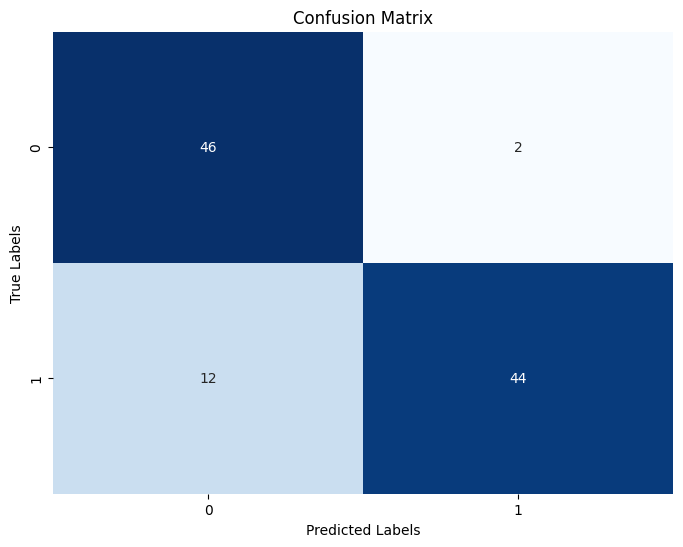

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
